روی دیتای

cardio_train1

شبکه عمیق خود را به صورت های

sequentional functional classbase

و تیون کردن هایپر پارمتر ها ترین کنید

1- حتما تنسور بورد داشته باشد و به صورت یک لینک داده شود

2-EarlyStopping

3-  در ابتدای هر ایپاک شماره ایپاک و مقدار لاس را در متن زیر پرینت کند

in ... epoch loss is ...


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import datetime
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
df = pd.read_csv('cardio_train1.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
del df['id']
#df.head()

In [5]:
df['age'] = df['age'].map(lambda x : x // 365)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1


In [6]:
df.shape

(70000, 12)

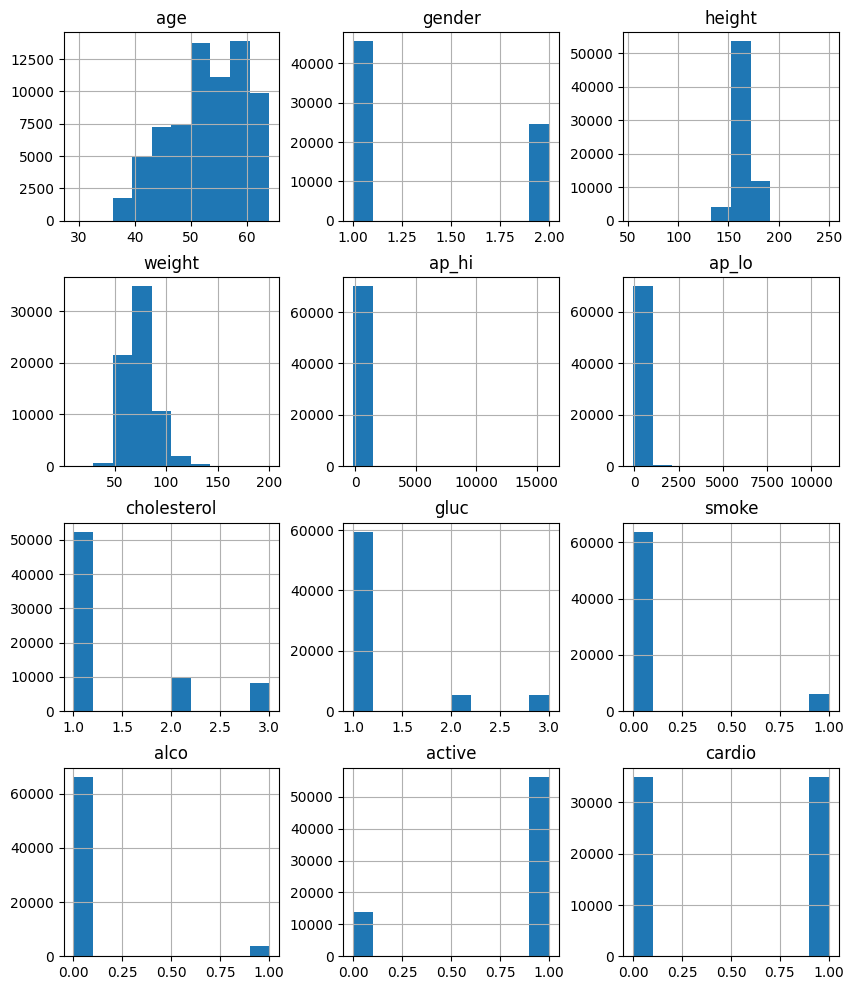

In [17]:
df.hist(figsize=(10,12))
plt.show()

In [6]:
X = df.drop(['cardio'], axis=1)
Y = df['cardio']

# Sequential API

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300,input_dim=11, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               3600      
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 34,710
Trainable params: 34,710
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [26]:
history = model.fit(X, Y,validation_split=0.2 ,epochs=10)

Epoch 1/10
1750/1750 [==============================] - 12s 5ms/step - loss: 2.5554 - accuracy: 0.5002 - val_loss: 0.7079 - val_accuracy: 0.4995
Epoch 2/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.7151 - accuracy: 0.5010 - val_loss: 0.6972 - val_accuracy: 0.4996
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.6988 - accuracy: 0.4986 - val_loss: 0.6957 - val_accuracy: 0.4995
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.6967 - accuracy: 0.5011 - val_loss: 0.6947 - val_accuracy: 0.5005
Epoch 5/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.6957 - accuracy: 0.5033 - val_loss: 0.6957 - val_accuracy: 0.5006
Epoch 6/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.6949 - accuracy: 0.5008 - val_loss: 0.6961 - val_accuracy: 0.4995
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.6952 - accuracy: 0.4975 - val_loss: 0.6940 - val_accuracy

In [29]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(32,input_dim=11, activation="relu"))
model1.add(keras.layers.Dense(8, activation="relu"))
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [31]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history1 = model1.fit(X, Y,validation_split=0.20, epochs=10, batch_size=16)

Epoch 1/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5688 - accuracy: 0.7148 - val_loss: 0.5692 - val_accuracy: 0.7161
Epoch 2/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5668 - accuracy: 0.7174 - val_loss: 0.5736 - val_accuracy: 0.7120
Epoch 3/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5663 - accuracy: 0.7160 - val_loss: 0.5665 - val_accuracy: 0.7161
Epoch 4/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5646 - accuracy: 0.7174 - val_loss: 0.5649 - val_accuracy: 0.7188
Epoch 5/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5645 - accuracy: 0.7163 - val_loss: 0.5886 - val_accuracy: 0.7099
Epoch 6/10
3500/3500 [==============================] - 12s 3ms/step - loss: 0.5633 - accuracy: 0.7171 - val_loss: 0.5654 - val_accuracy: 0.7178
Epoch 7/10
3500/3500 [==============================] - 13s 4ms/step - loss: 0.5647 - accuracy: 0.7184 - val_loss: 0.5667 - val_ac

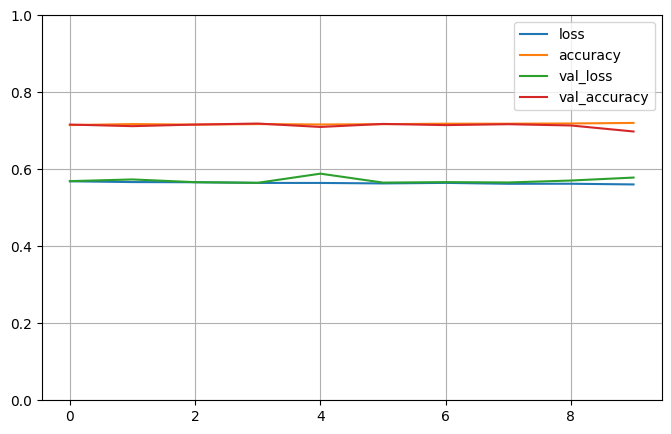

In [35]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

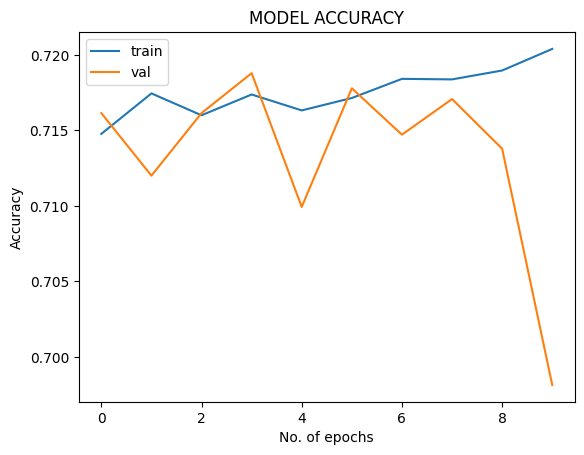

In [36]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Tune Batch Size and Number of Epochs

In [7]:
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32,input_dim=11, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
model = KerasClassifier(model=create_model, verbose=0)

In [10]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 70]

In [11]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [12]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.726657 using {'batch_size': 10, 'epochs': 70}


In [ ]:
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Tune the Training Optimization Algorithm

In [8]:
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=10, batch_size=10, verbose=0)

In [9]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


In [10]:
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.718943 using {'optimizer': 'Adagrad'}


# EarlyStopping

In [17]:
model = keras.models.Sequential([
keras.layers.Dense(22, input_dim=11,activation='relu'),
keras.layers.Dense(13,activation='softmax'),
])

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

In [31]:
model.compile(tf.keras.optimizers.SGD(), loss="mse",metrics=['accuracy'])

In [32]:
history_er = model.fit(X,Y,epochs=20, batch_size=32,validation_split=0.20 ,callbacks=[callback],verbose=0)

In [33]:
print(len(history_er.history['loss']))

6


# TensorBoard with Keras

In [43]:
tensorboard -- logdir=log

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 24928.

In [45]:
model = create_model()
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X, Y, epochs=5, validation_split=0.20, callbacks=[tensorboard_callback])

Epoch 1/5
1750/1750 [==============================] - 10s 5ms/step - loss: 0.4995 - accuracy: 0.5005 - val_loss: 0.5006 - val_accuracy: 0.4994
Epoch 2/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.5005 - val_loss: 0.5006 - val_accuracy: 0.4994
Epoch 3/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.5005 - val_loss: 0.5006 - val_accuracy: 0.4994
Epoch 4/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.5005 - val_loss: 0.5006 - val_accuracy: 0.4994
Epoch 5/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.5005 - val_loss: 0.5006 - val_accuracy: 0.4994


In [49]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 29768), started 0:11:33 ago. (Use '!kill 29768' to kill it.)

# Functional API

In [49]:
model_input = tf.keras.layers.Input(shape=(11,))
output = tf.keras.layers.Dense(32, activation = 'relu')(model_input)
output = tf.keras.layers.Dense(10, activation = 'sigmoid')(output)
model_1 = tf.keras.Model(model_input, output)

In [50]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_15 (Dense)            (None, 32)                384       
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________


In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.00001, nesterov=False, name='SGD')

In [55]:
model_1.compile(loss="mse", optimizer=optimizer,metrics=['accuracy'])
history_1 = model_1.fit(X,Y, epochs=20,validation_split=0.20, batch_size=16 )

Epoch 1/20
3500/3500 [==============================] - 11s 3ms/step - loss: 0.4756 - accuracy: 2.6786e-04 - val_loss: 0.4752 - val_accuracy: 3.5714e-04
Epoch 2/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.4754 - accuracy: 2.8571e-04 - val_loss: 0.4750 - val_accuracy: 3.5714e-04
Epoch 3/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.4753 - accuracy: 2.8571e-04 - val_loss: 0.4749 - val_accuracy: 3.5714e-04
Epoch 4/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.4751 - accuracy: 2.8571e-04 - val_loss: 0.4747 - val_accuracy: 3.5714e-04
Epoch 5/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.4749 - accuracy: 2.8571e-04 - val_loss: 0.4746 - val_accuracy: 3.5714e-04
Epoch 6/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.4748 - accuracy: 3.2143e-04 - val_loss: 0.4745 - val_accuracy: 3.5714e-04
Epoch 7/20
3500/3500 [==============================] - 10s 3ms/step - loss: 0.474

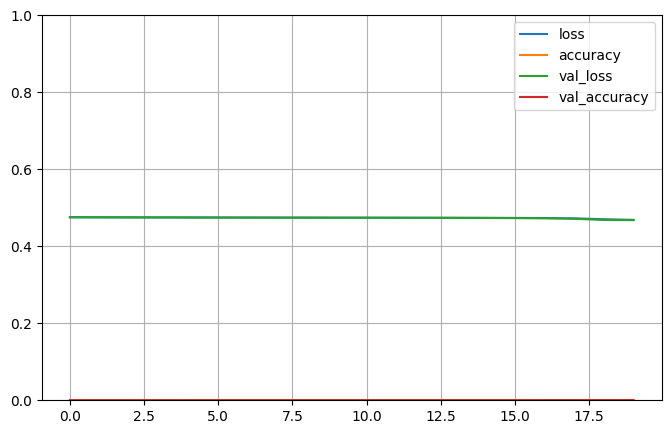

In [56]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

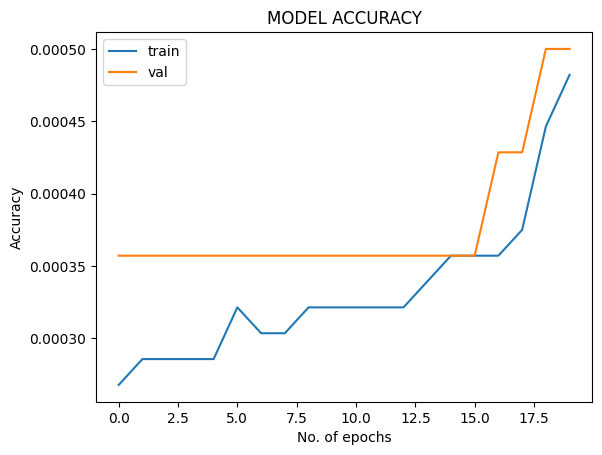

In [57]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

linux

1- با چه دستوری مسیر پایتون را پیدا کنیم



2- با چه دستوری از نوع فایل مطمین میشبم



3-منظور از اعداد نشان داده شده بعد از زدت دستور زیر چیست



4- دستوری که دایرکتوری بسازد که درون آن یک دایرکتوری دیگر هم هست



5- با چه دستوری فایل بالا را به صورت ریکرسیو پاک می کنید



6- با چه کامتد هایی میتوان فایل را خواند 



7- برای تعقیب تعییرات یک فایل چه دستوری را پیشنهاد میدهید


8- معادل دستورپرینت در بش چیست 

